## Storytelling do projeto

A base escolhida para o projeto é a "Credit Card Transactions Fraud Detection Dataset" do Kaggle, podendo ser acessada através do link https://www.kaggle.com/datasets/kartik2112/fraud-detection/data.

Trata-se de uma base contendo transações simuladas de cartão de crédito com a marcação de legítimas ou fraude.

A base possui 22 colunas, sendo elas:

| Campo | Descrição |
|-------|-----------|
| trans_date_trans_time | Data e hora da transação |
| cc_num | Número da conta corrente do cliente |
| merchant | Comerciante em que a transação foi efetuada |
| category | Categoria do tipo da transação efetuada |
| amt | Valor da transação |
| first | Primeiro nome do cliente |
| last | Último nome do cliente |
| gender | Gênero do cliente |
| street | Rua de residência do cliente |
| city | Cidade de residência do cliente |
| state | Estado de residência do cliente |
| zip | CEP de residência do cliente |
| lat | Latitude da residência do cliente |
| long | Longitude da residência do cliente |
| city_pop | Tamanho populacional da cidade do cliente |
| job | Profissão do cliente |
| dob | Data de nascimento do cliente |
| trans_num | Identificação da transação |
| unix_time | Identificação de horário da transação |
| merch_lat | Latitude do comércio em que foi feita a transação |
| merch_long | Longitude do comércio em que foi feita a transação |
| is_fraud | Marcação se a transação foi fraude ou não |


O objetivo é do projeto desenvolver um modelo para prever transações que sejam fraude.


### 1. Importação de bibliotecas

In [126]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
#import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import auc, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#retirando os warnings
import warnings
warnings.filterwarnings('ignore')


### 2. Carregamento da base

In [127]:
df = pd.read_csv("base_fraude.csv")

In [128]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


### 3. Análise exploratória

Verificado o desbalanceamento entre as clases, feita a análise de correlação e a distribuição das variáveis. 

A base possuia somente 1 dado ausente, que foi excluído. Ela apresenta dados númericos e categóricos.

Foi feita a inclusão de um campo representando o período em que a transação ocorreu.

Retiradas as colunas que não eram necessárias para o dataset. 

Como a base é muito grande, foi feita uma amostragem.

In [129]:
df.shape

(666541, 23)

In [130]:
#Base possui variáveis categóricas e núméricas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666541 entries, 0 to 666540
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             666541 non-null  int64  
 1   trans_date_trans_time  666541 non-null  object 
 2   cc_num                 666541 non-null  int64  
 3   merchant               666541 non-null  object 
 4   category               666540 non-null  object 
 5   amt                    666540 non-null  float64
 6   first                  666540 non-null  object 
 7   last                   666540 non-null  object 
 8   gender                 666540 non-null  object 
 9   street                 666540 non-null  object 
 10  city                   666540 non-null  object 
 11  state                  666540 non-null  object 
 12  zip                    666540 non-null  float64
 13  lat                    666540 non-null  float64
 14  long                   666540 non-nu

In [131]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,666541.000000,6.665410e+05,666540.000000,666540.000000,666540.000000,666540.000000,6.665400e+05,6.665400e+05,666540.000000,666540.000000,666540.000000
mean,333270.000000,4.168097e+17,70.229763,48785.470627,38.535325,-90.221037,8.903046e+04,1.338531e+09,38.535176,-90.221454,0.005899
std,192413.957224,1.308453e+18,159.572255,26910.126788,5.074945,13.768429,3.026885e+05,6.728932e+06,5.109133,13.780324,0.076579
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.029798,-166.671242,0.000000
25%,166635.000000,1.800365e+14,9.640000,26041.000000,34.668900,-96.798000,7.430000e+02,1.333035e+09,34.739891,-96.889066,0.000000
50%,333270.000000,3.520550e+15,47.390000,48174.000000,39.354300,-87.476900,2.456000e+03,1.339100e+09,39.365240,-87.431136,0.000000
75%,499905.000000,4.642255e+15,83.010000,72011.000000,41.894800,-80.158000,2.047800e+04,1.344158e+09,41.953533,-80.217445,0.000000
max,666540.000000,4.992346e+18,26544.120000,99783.000000,66.693300,-67.950300,2.906700e+06,1.349964e+09,67.510267,-66.956540,1.000000


In [132]:
#Verificando a quantidade de valores únicos nas colunas categóricas
df[["city","state","job", "merchant","category","gender"]].nunique()

city        866
state        51
job         486
merchant    694
category     14
gender        2
dtype: int64

In [133]:
#Verificando se a base contém valores nulos

nulos = pd.DataFrame({
    "Quantidade" : df.isnull().sum(),
    "Percentual": df.isnull().sum()/len(df)*100
    })
nulos

,Quantidade,Percentual
Unnamed: 0,0,0.00000
trans_date_trans_time,0,0.00000
cc_num,0,0.00000
merchant,0,0.00000
category,1,0.00015
amt,1,0.00015
first,1,0.00015
last,1,0.00015
gender,1,0.00015
street,1,0.00015


In [134]:
#Como só possui 1 registro com valores nulos, optei por excluir o registro

df = df.dropna()

#Verificando se a base contém valores nulos

nulos = pd.DataFrame({
    "Quantidade" : df.isnull().sum(),
    "Percentual": df.isnull().sum()/len(df)*100
    })
nulos

,Quantidade,Percentual
Unnamed: 0,0,0.0
trans_date_trans_time,0,0.0
cc_num,0,0.0
merchant,0,0.0
category,0,0.0
amt,0,0.0
first,0,0.0
last,0,0.0
gender,0,0.0
street,0,0.0


In [135]:
#Transformando o campo de horário da transação para segregar os dados por períodos do dia em que ocorreram as transações
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

In [136]:
#separando o horário da transação para aplicação da função
df["hora"] = df["trans_date_trans_time"].dt.hour

In [137]:
#definição da função e aplicação 

def classificar_periodo_dia(hora):
    if 0 >= hora <6:
        return "madrugada"
    elif 6 >= hora < 12:
        return "manha"
    elif 12 <= hora < 18:
        return "tarde"
    else:
        return "noite"
    
df["periodo"] = df["hora"].apply(classificar_periodo_dia)

In [138]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hora,periodo
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,0,madrugada
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,0,madrugada
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,0,madrugada
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,0,madrugada
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,0,madrugada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666535,666535,2019-10-11 14:02:28,4562827002127,fraud_Marvin-Lind,personal_care,2.48,Christopher,Johnson,M,28711 Kristine Junction Suite 309,...,22930.0,Media planner,1971-11-26,38ec51ab9f26481154218557a6930de3,1.349964e+09,40.077773,-85.339883,0.0,14,tarde
666536,666536,2019-10-11 14:03:45,4939976756738216,fraud_Lind-Buckridge,entertainment,108.52,Michelle,Johnston,F,3531 Hamilton Highway,...,18128.0,IT trainer,1990-11-07,46830146dfe37c200f0c30b8c8157858,1.349964e+09,25.758379,-99.970657,0.0,14,tarde
666537,666537,2019-10-11 14:03:57,180018375329178,fraud_Erdman-Durgan,health_fitness,13.21,Michelle,Woods,F,952 Joseph Throughway,...,2523.0,Geophysicist/field seismologist,1988-03-21,87f4cff387c2429647ccfbb1f8b3c33b,1.349964e+09,42.133720,-83.591627,0.0,14,tarde
666538,666538,2019-10-11 14:04:26,2712209726293386,fraud_Macejkovic-Lesch,shopping_pos,104.85,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,378909.0,"Designer, furniture",1977-02-22,1d1f6134667ace8357736b7918fee94f,1.349964e+09,29.923241,-91.309698,0.0,14,tarde


In [139]:
# Retirando as colunas que não são necessárias para o modelo

df = df.drop([ "Unnamed: 0", "unix_time", "hora", "cc_num", "first", "last", "street", "city", "state", "zip", "trans_num", "trans_date_trans_time", "dob", "job", "merchant"], axis=1)

In [140]:
df

,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,periodo
0,misc_net,4.97,F,36.0788,-81.1781,3495.0,36.011293,-82.048315,0.0,madrugada
1,grocery_pos,107.23,F,48.8878,-118.2105,149.0,49.159047,-118.186462,0.0,madrugada
2,entertainment,220.11,M,42.1808,-112.2620,4154.0,43.150704,-112.154481,0.0,madrugada
3,gas_transport,45.00,M,46.2306,-112.1138,1939.0,47.034331,-112.561071,0.0,madrugada
4,misc_pos,41.96,M,38.4207,-79.4629,99.0,38.674999,-78.632459,0.0,madrugada
...,...,...,...,...,...,...,...,...,...,...
666535,personal_care,2.48,M,40.0987,-84.6342,22930.0,40.077773,-85.339883,0.0,tarde
666536,entertainment,108.52,F,26.4215,-99.0025,18128.0,25.758379,-99.970657,0.0,tarde
666537,health_fitness,13.21,F,42.3703,-84.2485,2523.0,42.133720,-83.591627,0.0,tarde
666538,shopping_pos,104.85,F,30.4066,-91.1468,378909.0,29.923241,-91.309698,0.0,tarde


In [141]:
#verificando o balanceamento das classes
#a base é muito desbalanciada
df["is_fraud"].value_counts(normalize=True)

is_fraud
0.0    0.994101
1.0    0.005899
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'is_fraud'}>]], dtype=object)

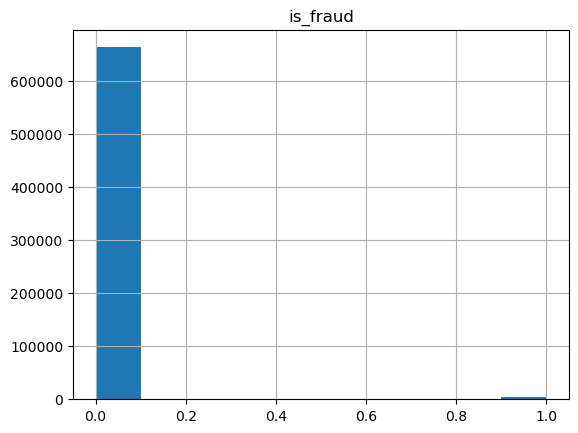

In [142]:
df.hist("is_fraud")

In [143]:
#separando o target do restante da base
x = df.drop("is_fraud", axis=1)
y = df["is_fraud"]

In [144]:
#como a base é muito grande, tive problemas para rodar no meu computador, 
#por isso fiz uma amostragem da base mantendo a proporção do target através do parâmetro stratify do train_test_split
x_sample, _, y_sample, _ = train_test_split(x, y, train_size=0.02,stratify=y)

In [145]:
x_sample.shape

(13330, 9)

In [146]:
y_sample.shape

(13330,)

In [147]:
#verificando se o a proporção do target se manteve a mesma
y_sample.value_counts(normalize=True)

is_fraud
0.0    0.994074
1.0    0.005926
Name: proportion, dtype: float64

In [148]:
#separando as variáveis numéricas para verificar as distribuições e correlações entre variáveis
x_numerico = x_sample.select_dtypes(include=["int64", "float64"])

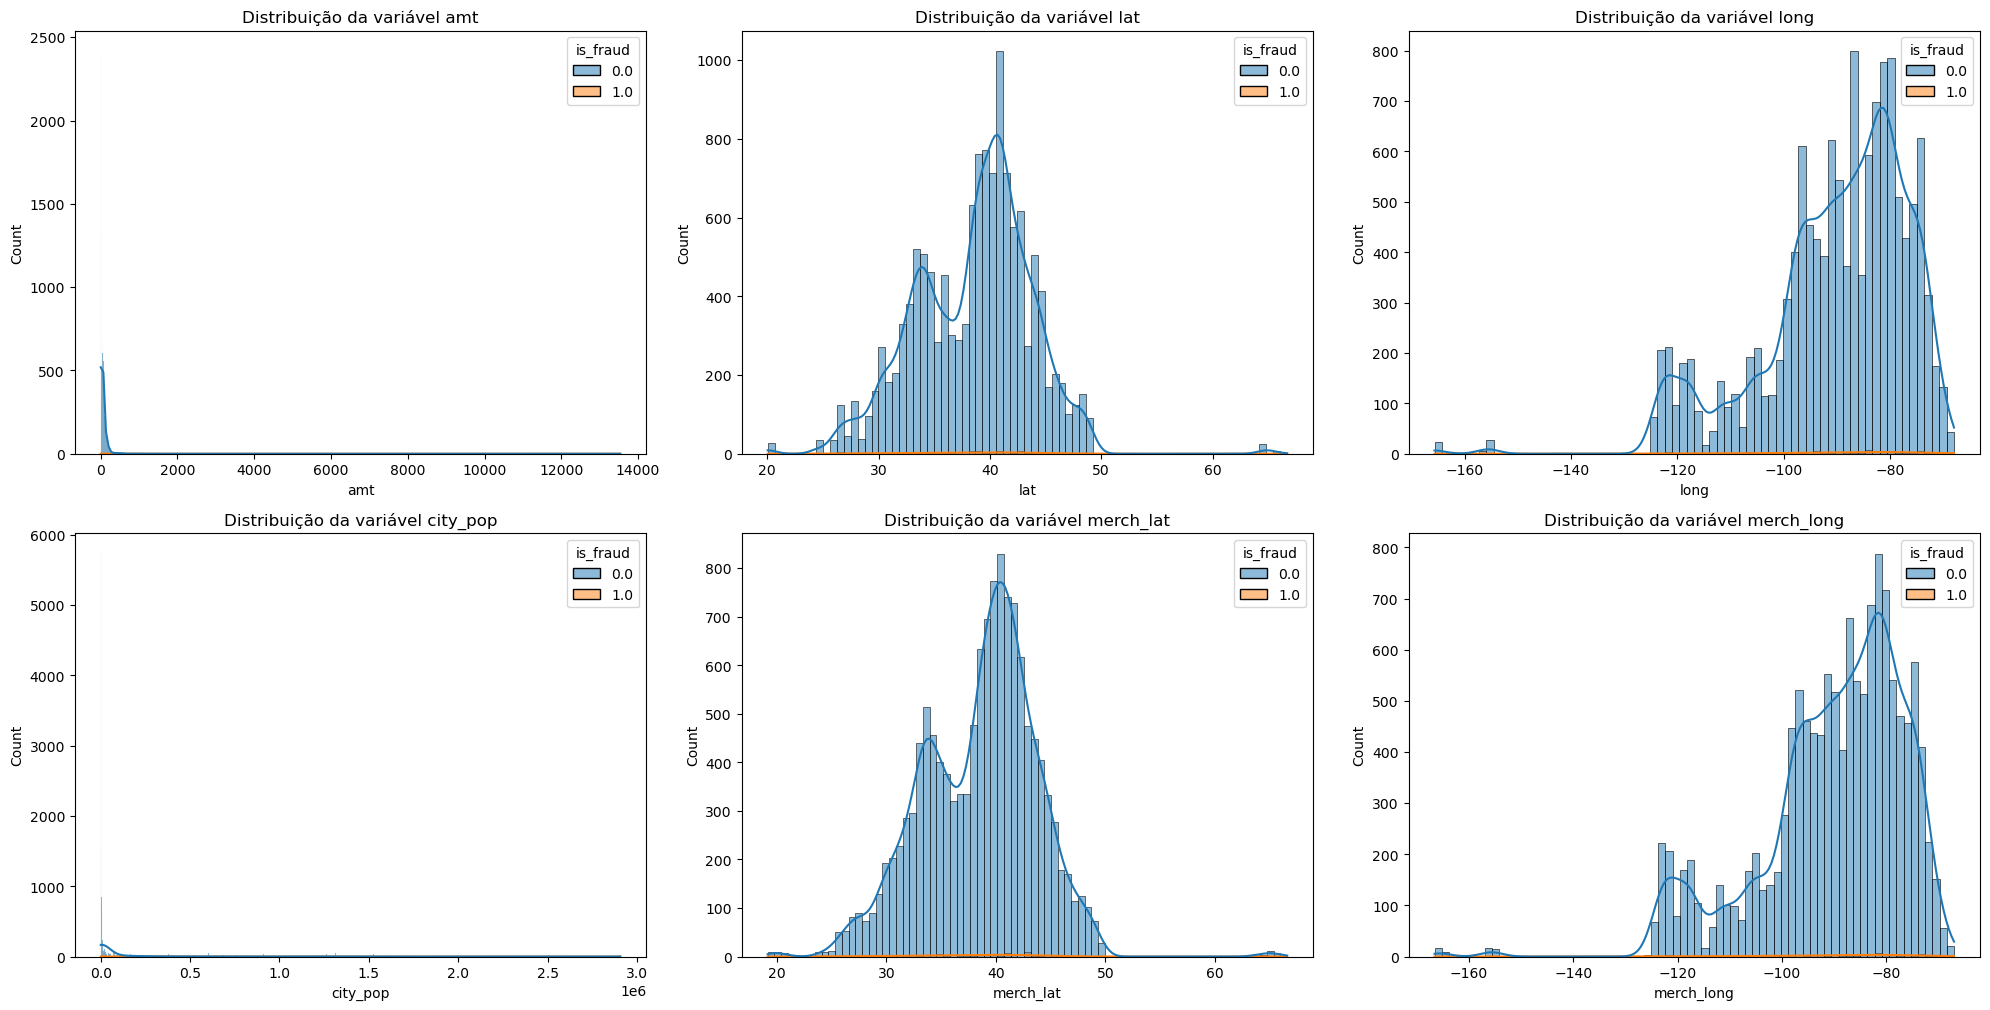

In [149]:
#verificando a distribuição das variáveis númericas

linhas, colunas = x_sample.shape

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 50))
axes = axes.flatten()


for i, coluna in enumerate(x_numerico.columns):
    sns.histplot(data=x_numerico, x=coluna, kde=True, hue=y_sample, ax=axes[i])
    axes[i].set_title(f"Distribuição da variável {coluna}")

# Remove subplots não utilizados (caso X tenha menos de 32 colunas)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('histogramas.png')
plt.show()

In [150]:
#verificando a correlação entre as variáveis
x_numerico.corr()

,amt,lat,long,city_pop,merch_lat,merch_long
amt,1.000000,0.000269,-0.009975,0.014307,0.000776,-0.010181
lat,0.000269,1.000000,-0.042958,-0.149527,0.993848,-0.043019
long,-0.009975,-0.042958,1.000000,-0.043295,-0.043233,0.999131
city_pop,0.014307,-0.149527,-0.043295,1.000000,-0.148561,-0.043416
merch_lat,0.000776,0.993848,-0.043233,-0.148561,1.000000,-0.043211
merch_long,-0.010181,-0.043019,0.999131,-0.043416,-0.043211,1.000000


<Axes: >

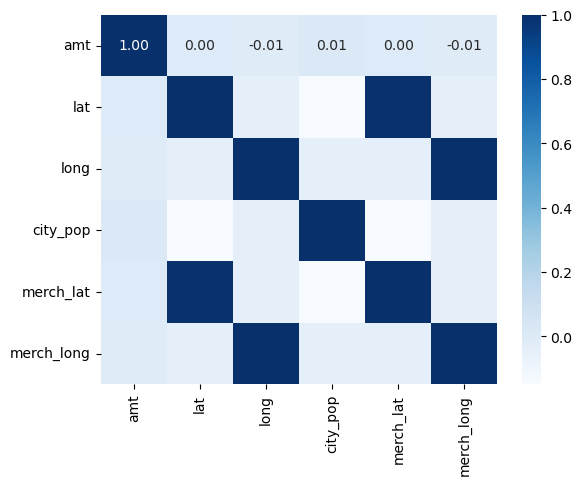

In [151]:
sns.heatmap(x_numerico.corr(), annot=True, cmap="Blues", fmt=".2f")

### 4. Pré-processamento

A base de treino e teste foi separada. 

Na pipeline, as colunas númericas e categóricas foram separadas para aplicação da padronização e do one-hot-encoding

In [152]:
x_train, x_test,y_train, y_test = train_test_split(x_sample,y_sample, stratify=y_sample, test_size=0.2)

In [153]:
x_train.shape

(10664, 9)

In [154]:
x_test.shape

(2666, 9)

In [155]:
#separando as variáveis categóricas e númericas pois terão tratamentos diferentes na pipeline

x_train_numerico = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
x_train_categorico = x_train.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

In [156]:
#pipelines para cada tipo de dado
#númericos serão padronizados através do standardscaler e os categóricos serão transformados através do onehotencoder

transformer_numerico = Pipeline(
    steps=[
        ("scaler", StandardScaler() )
    ]
)

transformer_categorico = Pipeline(
    steps=[
        ("onehot", OneHotEncoder() )
    ]
)

In [157]:
preprocessor = ColumnTransformer(
    transformers=[
        ('colunas_numericas', transformer_numerico, x_train_numerico),
        ('colunas_categoricas', transformer_categorico, x_train_categorico)
    ]

)

### 5. Treinamento, Validação e Teste


In [158]:
modelos = {
    "LG - Logistic Regression": LogisticRegression(random_state=42),
    "LG - Logistic Regression cw": LogisticRegression(random_state=42, class_weight="balanced"),
    "DT - Decision Tree md10 gini": DecisionTreeClassifier(max_depth=10, criterion="gini", random_state=42),
    "DT - Decision Tree md5 gini": DecisionTreeClassifier(max_depth=10, criterion= "gini", random_state=42),
    "DT - Decision Tree md5 entropy": DecisionTreeClassifier(max_depth=10, criterion= "entropy", random_state=42),
    "DT - Decision Tree md5 entropy": DecisionTreeClassifier(max_depth=10, criterion= "entropy", random_state=42),
    "RF - Random Forest ne50 md10 gini": RandomForestClassifier(max_depth=10, n_estimators=50, criterion="gini"),
    "RF - Random Forest ne100 md10 gini": RandomForestClassifier(max_depth=10, n_estimators=100, criterion="gini"),
    "RF - Random Forest ne100 md10 gini": RandomForestClassifier(max_depth=10, n_estimators=100, criterion="gini"),
    "RF - Random Forest ne100 md10 entropy": RandomForestClassifier(max_depth=10, n_estimators=100, criterion="entropy"),
    "KNN - KNN k5 euclidean": KNeighborsClassifier(n_neighbors=5, metric="euclidean"),
    "KNN - KNN k10 euclidean": KNeighborsClassifier(n_neighbors=10, metric="euclidean"),
    "KNN - KNN k15 euclidean": KNeighborsClassifier(n_neighbors=15, metric="euclidean"),
    "KNN - KNN k20 euclidean": KNeighborsClassifier(n_neighbors=20, metric="euclidean"),
    "KNN - KNN k5 manhatan": KNeighborsClassifier(n_neighbors=5, metric="manhattan"),
    "KNN - KNN k10 manhatan": KNeighborsClassifier(n_neighbors=10, metric="manhattan"),
    "KNN - KNN k15 manhatan": KNeighborsClassifier(n_neighbors=15, metric="manhattan"),
    # "SVM - SVM linear ": SVC(probability=True, kernel="linear"), #não consegui rodar no meu computador
    # "SVM - SVM rbf ": SVC(probability=True, kernel="rbf"), #não consegui rodar no meu computador
}

In [159]:
#separação do número de folds do cross-validate, usando o StratifidKFold pois a base é desbalanceada
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [160]:
preprocessor

ColumnTransformer(transformers=[('colunas_numericas',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['amt', 'lat', 'long', 'city_pop', 'merch_lat',
                                  'merch_long']),
                                ('colunas_categoricas',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['category', 'gender', 'periodo'])])

Treinando o modelo: LG - Logistic Regression 


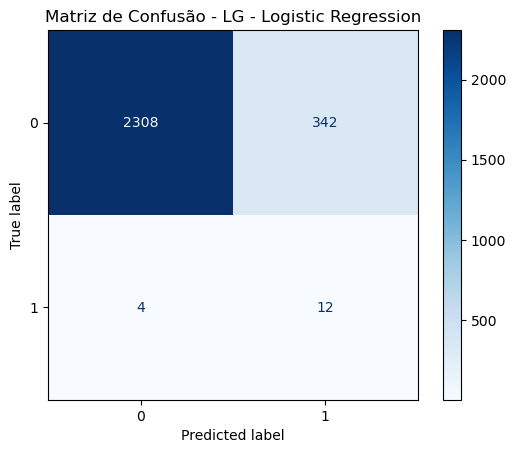

Treinando o modelo: LG - Logistic Regression cw 


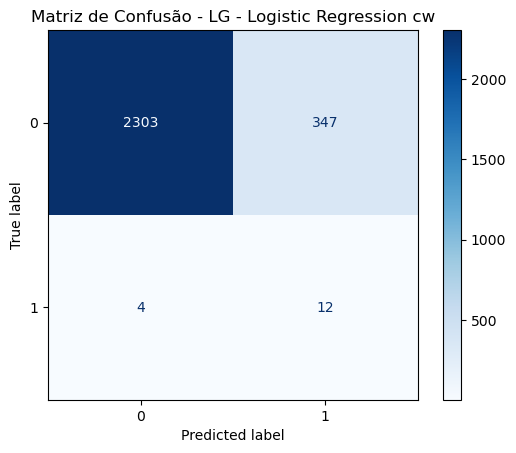

Treinando o modelo: DT - Decision Tree md10 gini 


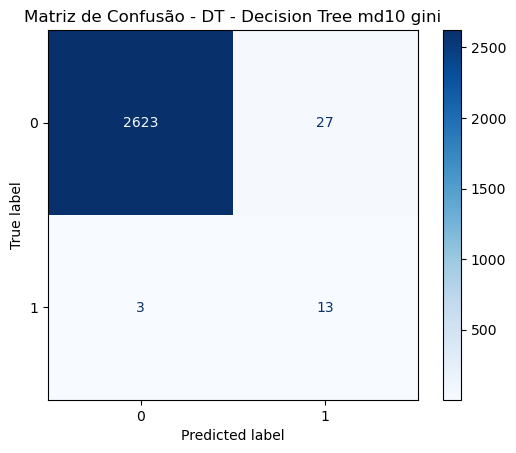

Treinando o modelo: DT - Decision Tree md5 gini 


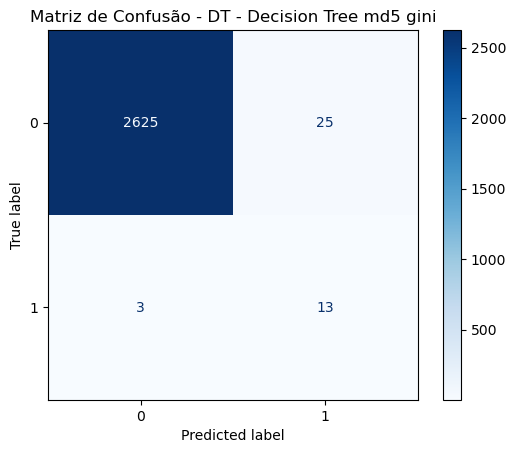

Treinando o modelo: DT - Decision Tree md5 entropy 


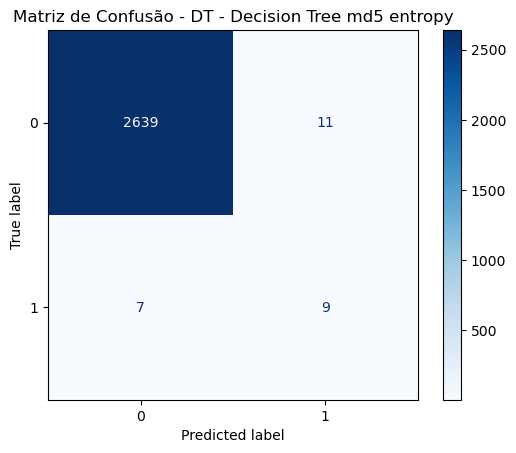

Treinando o modelo: RF - Random Forest ne50 md10 gini 


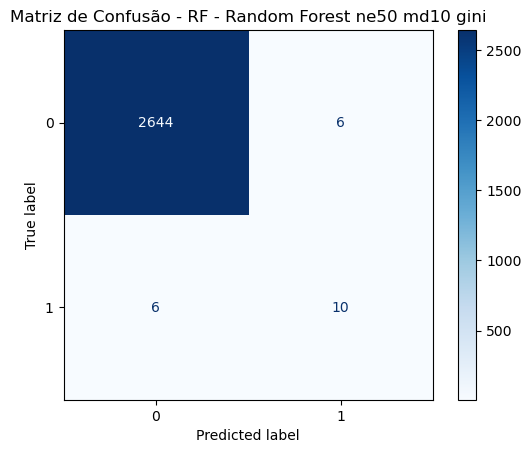

Treinando o modelo: RF - Random Forest ne100 md10 gini 


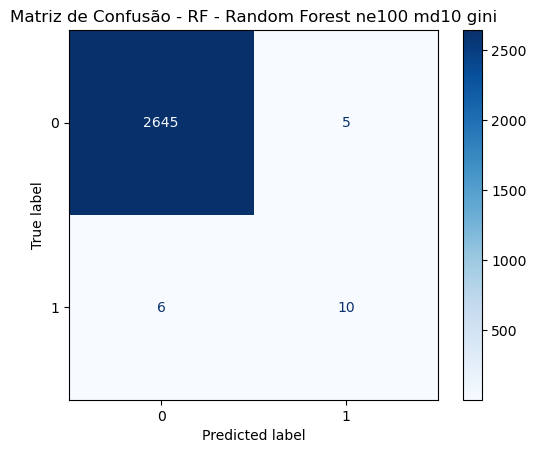

Treinando o modelo: RF - Random Forest ne100 md10 entropy 


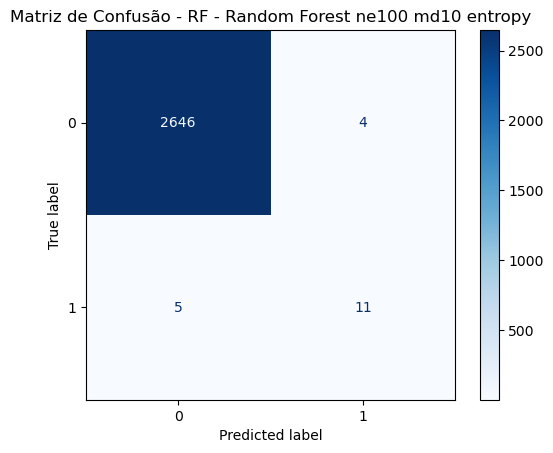

Treinando o modelo: KNN - KNN k5 euclidean 


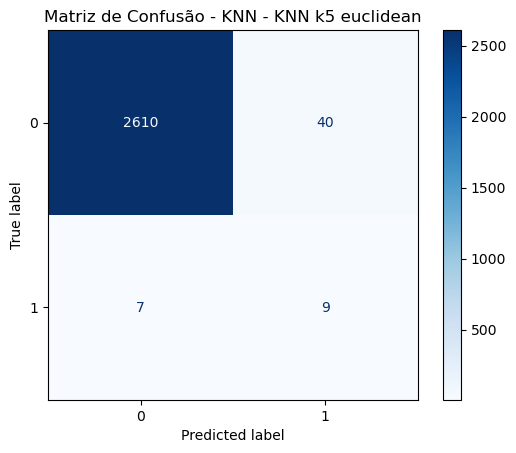

Treinando o modelo: KNN - KNN k10 euclidean 


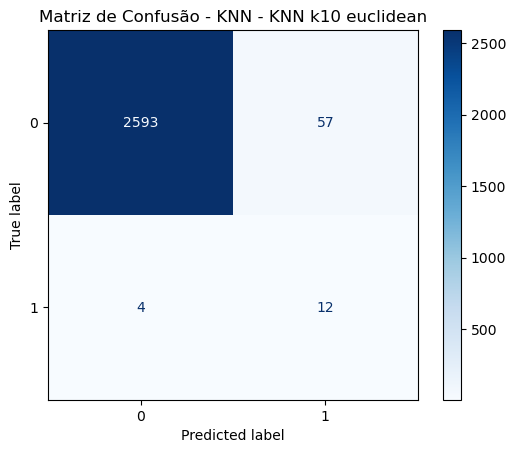

Treinando o modelo: KNN - KNN k15 euclidean 


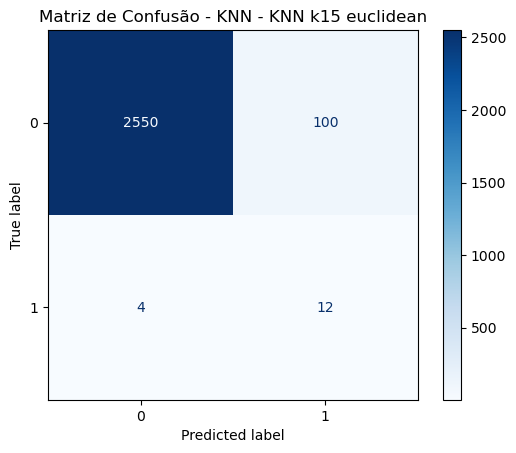

Treinando o modelo: KNN - KNN k20 euclidean 


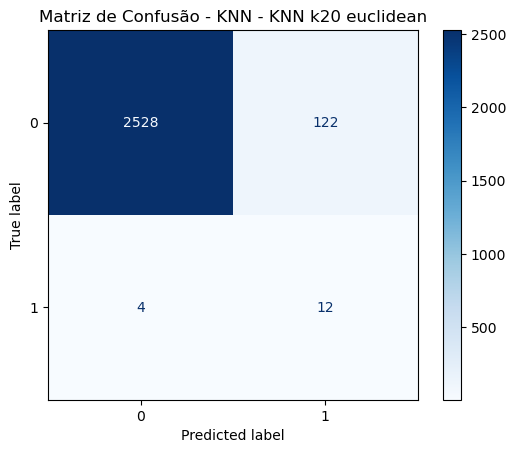

Treinando o modelo: KNN - KNN k5 manhatan 


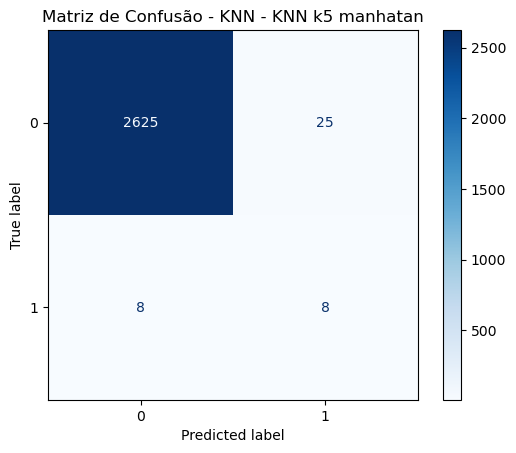

Treinando o modelo: KNN - KNN k10 manhatan 


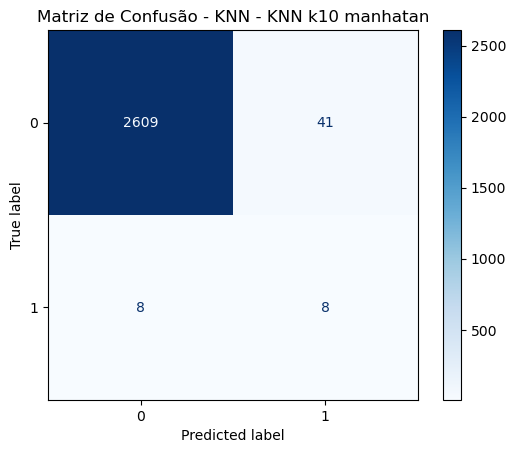

Treinando o modelo: KNN - KNN k15 manhatan 


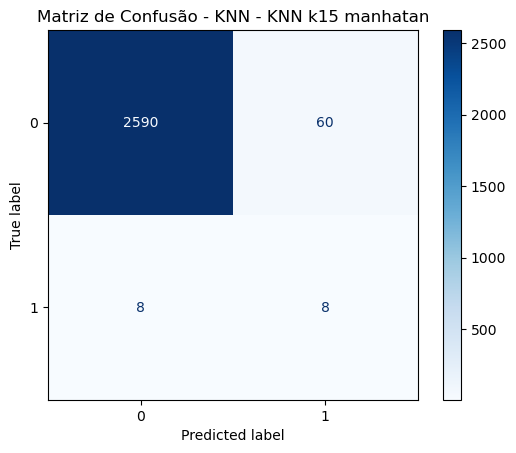

Resultados médios (Cross-Validation):
                                   Modelo  Accuracy  Precision    Recall  \
2            DT - Decision Tree md10 gini  0.987340   0.288983  0.778205   
0                LG - Logistic Regression  0.857552   0.030797  0.730769   
4          DT - Decision Tree md5 entropy  0.995218   0.586584  0.715385   
1             LG - Logistic Regression cw  0.855867   0.028555  0.711538   
3             DT - Decision Tree md5 gini  0.988278   0.295469  0.711538   
9                 KNN - KNN k10 euclidean  0.973931   0.137534  0.648718   
11                KNN - KNN k20 euclidean  0.956583   0.083119  0.632051   
8                  KNN - KNN k5 euclidean  0.982558   0.193407  0.605128   
10                KNN - KNN k15 euclidean  0.959022   0.078513  0.567949   
14                 KNN - KNN k15 manhatan  0.975900   0.130510  0.553846   
6      RF - Random Forest ne100 md10 gini  0.993529   0.480000  0.539744   
13                 KNN - KNN k10 manhatan  0.98180

In [161]:
resultados = []
roc_data = {}

for nome, modelo in modelos.items():
    print(f"Treinando o modelo: {nome} " )

    pipeline = ImbPipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("smote", SMOTE()),
            ("modelo", modelo)
        ]
    )

    scores = cross_validate(
        pipeline, x_train, y_train, cv=cv, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"], return_train_score=False
    )

    resultados.append({
        "Modelo": nome,
        "Accuracy": scores["test_accuracy"].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1': scores['test_f1'].mean(),
        'ROC_AUC': scores['test_roc_auc'].mean(),
    })

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    y_prob = pipeline.predict_proba(x_test)[:,1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[nome] = {"fpr": fpr, "tpr": tpr, "auc": auc(fpr,tpr)}

    
    cm = confusion_matrix(y_test, y_pred)
   
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()

resultados_df = pd.DataFrame(resultados).sort_values(by="Recall", ascending=False)
print(f"Resultados médios (Cross-Validation):")
print(resultados_df)


### 7. Avaliação de Modelos

In [162]:
#o melhor resultado levando em consideração a métrica Recall foi a Logistic Regression sem parametrização
#que mede a capacidade do modelo identificar corretamente os positivos reais
#essa métrica é a mais importante para os casos de fraudes

pd.DataFrame(resultados)

,Modelo,Accuracy,Precision,Recall,F1,ROC_AUC
0,LG - Logistic Regression,0.857552,0.030797,0.730769,0.058858,0.866550
1,LG - Logistic Regression cw,0.855867,0.028555,0.711538,0.054850,0.881391
2,DT - Decision Tree md10 gini,0.987340,0.288983,0.778205,0.421016,0.873298
3,DT - Decision Tree md5 gini,0.988278,0.295469,0.711538,0.417103,0.850414
4,DT - Decision Tree md5 entropy,0.995218,0.586584,0.715385,0.641737,0.853030
5,RF - Random Forest ne50 md10 gini,0.994092,0.505598,0.475641,0.488193,0.941756
6,RF - Random Forest ne100 md10 gini,0.993529,0.480000,0.539744,0.502704,0.960109
7,RF - Random Forest ne100 md10 entropy,0.995030,0.625641,0.476923,0.527378,0.953549
8,KNN - KNN k5 euclidean,0.982558,0.193407,0.605128,0.291182,0.795074
9,KNN - KNN k10 euclidean,0.973931,0.137534,0.648718,0.226048,0.837065


### 8. Comporativo de Performances

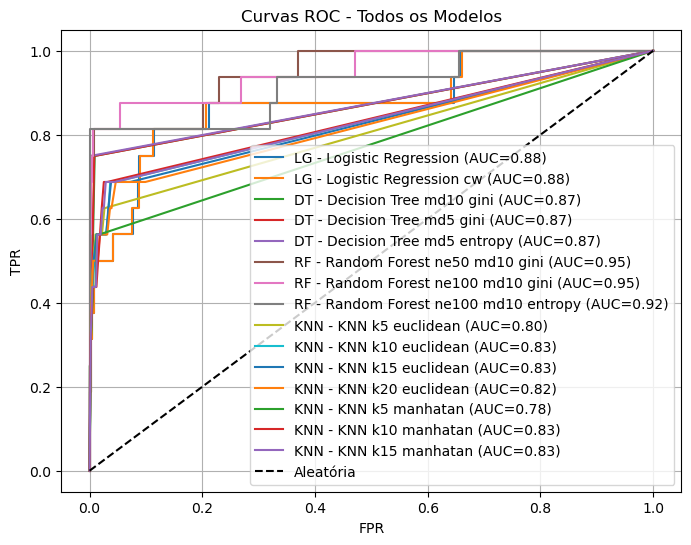

In [125]:

plt.figure(figsize=(8,6))
for nome, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{nome} (AUC={data["auc"]:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Aleatória')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC - Todos os Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
